# **Project Name**    -  <b><u> Seoul Bike Sharing Demand Prediction </u></b>



##### **Project Type**    - EDA/ML-Regression
##### **Contribution**    - Individual



# **Project Summary -**

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset First View

In [3]:
# Dataset First Look
file= '/content/drive/MyDrive/SeoulBikeData.csv'
df = pd.read_csv(file,encoding = "ISO-8859-1")
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape


(8760, 14)

### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

No duplicate values found.

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

No Null values found.


### What did you know about your dataset?

In [8]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [10]:
dict_rename_col = {'Temperature(°C)':'temp',
                   'Humidity(%)':'humidity',
                   'Wind speed (m/s)':'wind_speed',
                   'Visibility (10m)':'visibility',
                   'Dew point temperature(°C)':'dew_point_temperature',
                   'Solar Radiation (MJ/m2)':'solar_radiation',
                   'Rainfall(mm)':'rainfall',
                   'Snowfall (cm)':'snowfall',
                   'Rented Bike Count':'rented_bike_count',
                   'Hour':'hour',
                   'Seasons':'seasons',
                   'Holiday':'holiday',
                   'Functioning Day':'functioning_day',
                   'Date':'date'
                   }
df = df.rename(columns = dict_rename_col)

In [11]:
df.head()

,date,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [12]:
# Dataset Describe
df.describe()

,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Variables Description

['date', 'rented_bike_count', 'hour', 'temp', 'humidity', 'wind_speed', 'visibility', 'dew_point_temperature', 'solar_radiation', 'rainfall', 'snowfall', 'seasons', 'holiday', 'functioning_day'
##
Total variables : 14##


## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.
df2=df.copy()

In [14]:
df2.head()

,date,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [15]:
def convert_hour(hour):
    # Add your logic to convert the hour here
    if hour >= 5 and hour < 12:
        return "Morning"
    elif hour >= 12 and hour < 17:
        return "Afternoon"
    elif hour >= 17 and hour < 21:
        return "Evening"
    else:
        return "Night"

df2['time_slot'] = df2['hour'].apply(convert_hour)

### What all manipulations have you done and insights you found?

THere is no need of data cleaning and no nulls values are found in the dataset.The dataframe "df" is copied to a new dataframe "df2" so that the visualizations are done in this dataframe. The dataset is ready for visualization.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1- Number of bikes rented according to time slot.


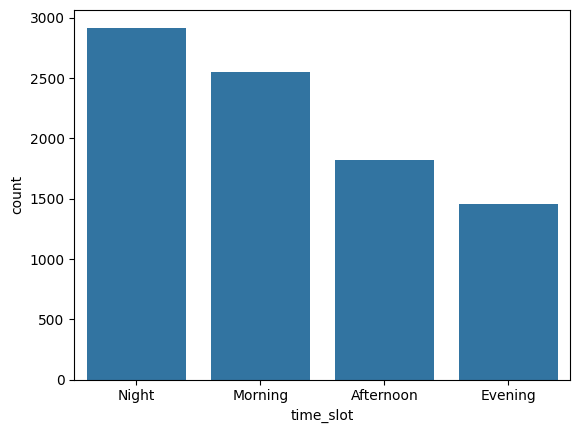

In [16]:
# Chart - 1 visualization code
sns.countplot(data = df2,x='time_slot')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
Because of different categories, bar chart is used.


##### 2. What is/are the insight(s) found from the chart?

 Findings :
      1. Bikes are mostly rented at night time
      2. Second most time slot at which bike is rented is morning.
      3. At evening least no of bikes are rented

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here, No Negative impact.

#### Chart - 2-Season and demand of bike

In [17]:
# Chart - 2 visualization code
season_demand = pd.DataFrame(data=df2.groupby('seasons')['rented_bike_count'].sum().reset_index())
season_demand

,seasons,rented_bike_count
0,Autumn,1790002
1,Spring,1611909
2,Summer,2283234
3,Winter,487169


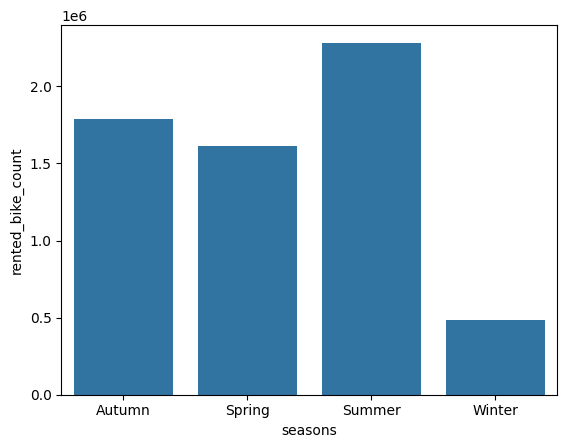

In [18]:
sns.barplot(data = season_demand,x = 'seasons',y='rented_bike_count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here, To visualize different categorical data.

##### 2. What is/are the insight(s) found from the chart?

It can be seen that demand of bike is in following order:
         Summer > Autumn > Spring > Winter
        
        

#### Chart - 3- Relation between temperature and bike demand

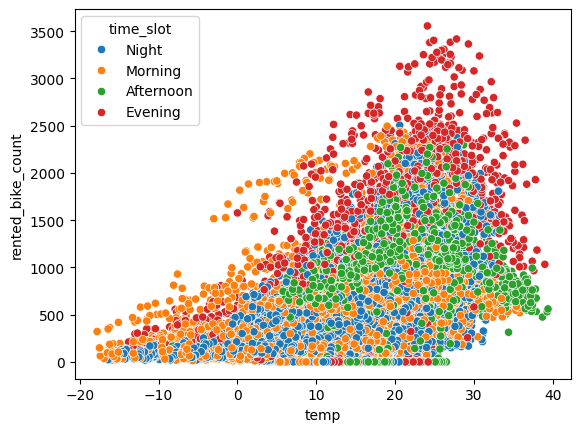

In [19]:
# Chart - 3 visualization code
sns.scatterplot(data = df2,x='temp',y='rented_bike_count',hue = 'time_slot' )
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plot best visualize more variables together for comparison.

##### 2. What is/are the insight(s) found from the chart?


Following are the relationship between temperature and demand of rental bike:
1. It can be seen that demand of bike increases with increase in temperature
2. When temperature is high demand for bike rental is more during evening.
3. When temperature is low demand for bike rental is during morning and night.      
        


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes this will help to increase the number of bikes available for rent at the peak times more specifically.

#### Chart - 4- count of Bikes rented during different temperature.

In [20]:
# Chart - 4 visualization code
df2['temp-range'] = pd.cut(df2['temp'], bins=range(-20,41,10), labels=[f'{l} to {l+10}' for l in range(-20,31,10)])
df2.head()

,date,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,time_slot,temp-range
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,-10 to 0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,-10 to 0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,-10 to 0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,-10 to 0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,-10 to 0


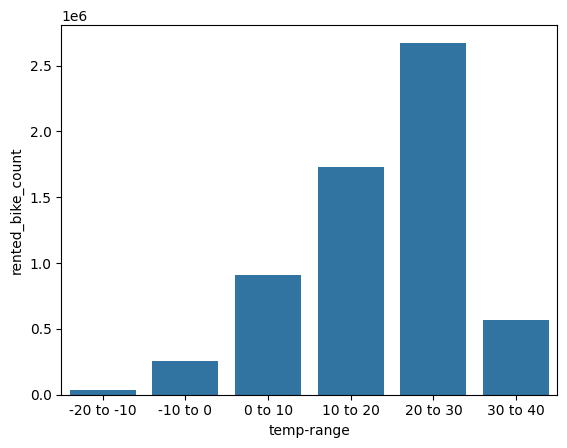

In [21]:
xx = df2.groupby('temp-range').agg({'rented_bike_count': 'sum'}).reset_index()
sns.barplot(data = xx,x='temp-range',y='rented_bike_count')
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart is used for there are different classes and count should be noted from each classes.

##### 2. What is/are the insight(s) found from the chart?

It is clear that bike rental demand is more when the temp is in the range 20-30 followed by 10-20.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The seller can increase the available number of bikes to maximum during these temperatures.

#### Chart - 5- Relationship between week day and demand for bike.


In [22]:
df3=df2.copy()
df3['date'] = pd.to_datetime(df3['date'], format='%d/%m/%Y')
df3['day_of_week'] = df3['date'].dt.day_name()
df3.head()

,date,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,time_slot,temp-range,day_of_week
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,-10 to 0,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,-10 to 0,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,-10 to 0,Friday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,-10 to 0,Friday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,-10 to 0,Friday


In [23]:
# Chart - 5 visualization code
weekday_demand = pd.DataFrame(data=df3.groupby('day_of_week')['rented_bike_count'].sum().reset_index())
weekday_demand


,day_of_week,rented_bike_count
0,Friday,950334
1,Monday,911743
2,Saturday,885492
3,Sunday,780194
4,Thursday,861999
5,Tuesday,858596
6,Wednesday,923956


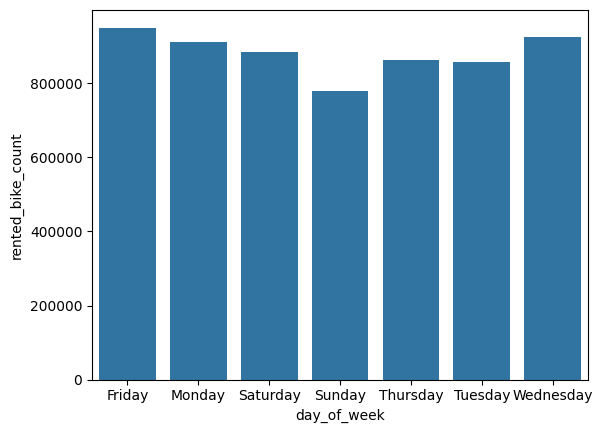

In [24]:
sns.barplot(data = weekday_demand,x = 'day_of_week',y='rented_bike_count')

plt.show()

##### 1. Why did you pick the specific chart?

To display different days of week in single graph.

##### 2. What is/are the insight(s) found from the chart?

It can be seen that almost at any day of the week demand is almost same, although friday has a slight higher demand.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes, company can increase rents on fridays to acquire more profit.


#### Chart - 6- Relationship between hour of the day and bike demand

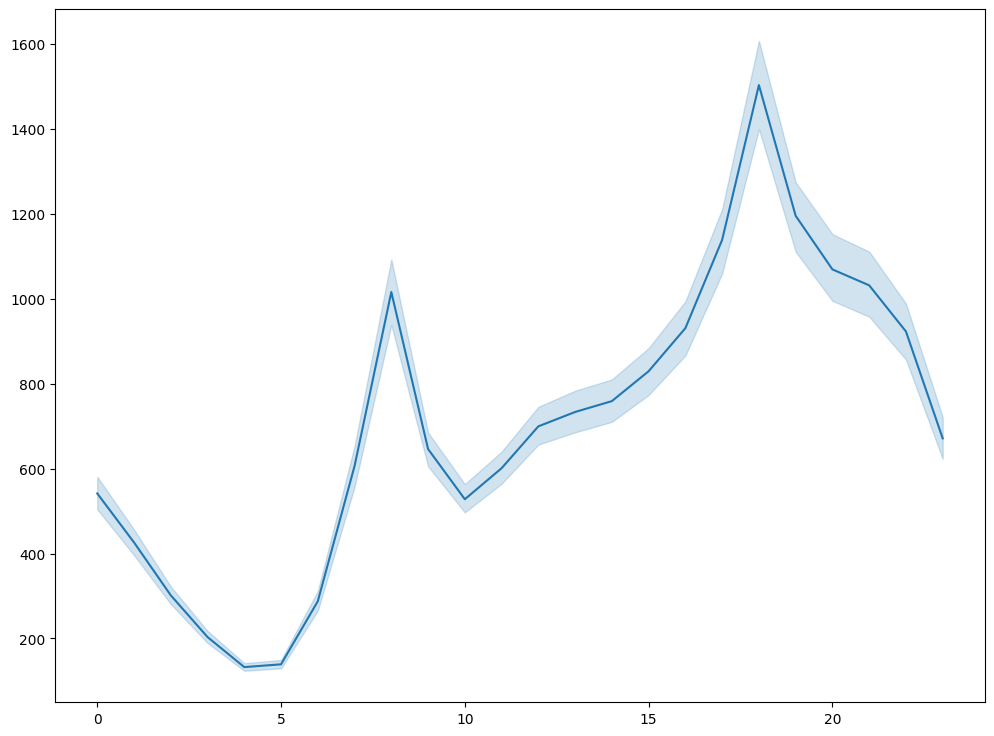

In [25]:
# Chart - 6 visualization code
plt.figure(figsize=(12,9))
sns.lineplot(data = df2 , x=df['hour'].values,y =df['rented_bike_count'].values)
plt.show()


##### 1. Why did you pick the specific chart?

Line chart best describes trends over time.

##### 2. What is/are the insight(s) found from the chart?

It can be seen that bike demand rises after 5 AM and peaks at 8 AM, then again rises after 2 PM and peaks at 5PM then demand remain significantly above average demand 6PM and 11PM

That means at 11th hour of the day bike demand is most.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Making bikes available at affordable rates in the peak hours and provinding more offers n the tough hours can handle the bussiness well.

#### Chart - Correlation Heatmap

In [26]:
df2

,date,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,time_slot,temp-range
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,-10 to 0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,-10 to 0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,-10 to 0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,-10 to 0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,-10 to 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Evening,0 to 10
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Evening,0 to 10
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Night,0 to 10
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,Night,0 to 10


In [27]:
# Correlation Heatmap visualization code
dff=df2.copy()
dff.drop(['date','seasons','temp','holiday','functioning_day','time_slot'],axis=1,inplace=True)
dff.head()


,rented_bike_count,hour,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,temp-range
0,254,0,37,2.2,2000,-17.6,0.0,0.0,0.0,-10 to 0
1,204,1,38,0.8,2000,-17.6,0.0,0.0,0.0,-10 to 0
2,173,2,39,1.0,2000,-17.7,0.0,0.0,0.0,-10 to 0
3,107,3,40,0.9,2000,-17.6,0.0,0.0,0.0,-10 to 0
4,78,4,36,2.3,2000,-18.6,0.0,0.0,0.0,-10 to 0


In [28]:
dff['temp-range'] = dff['temp-range'].astype('category').cat.codes
dff.corr()

,rented_bike_count,hour,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,temp-range
rented_bike_count,1.000000,0.410257,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,0.520342
hour,0.410257,1.000000,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,0.126956
humidity,-0.199780,-0.241644,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,0.164236
wind_speed,0.121108,0.285197,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-0.036171
visibility,0.199280,0.098753,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,0.021752
dew_point_temperature,0.379788,0.003054,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,0.890021
solar_radiation,0.261837,0.145131,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,0.342126
rainfall,-0.123074,0.008715,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,0.057642
snowfall,-0.141804,-0.021516,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,-0.211811
temp-range,0.520342,0.126956,0.164236,-0.036171,0.021752,0.890021,0.342126,0.057642,-0.211811,1.000000


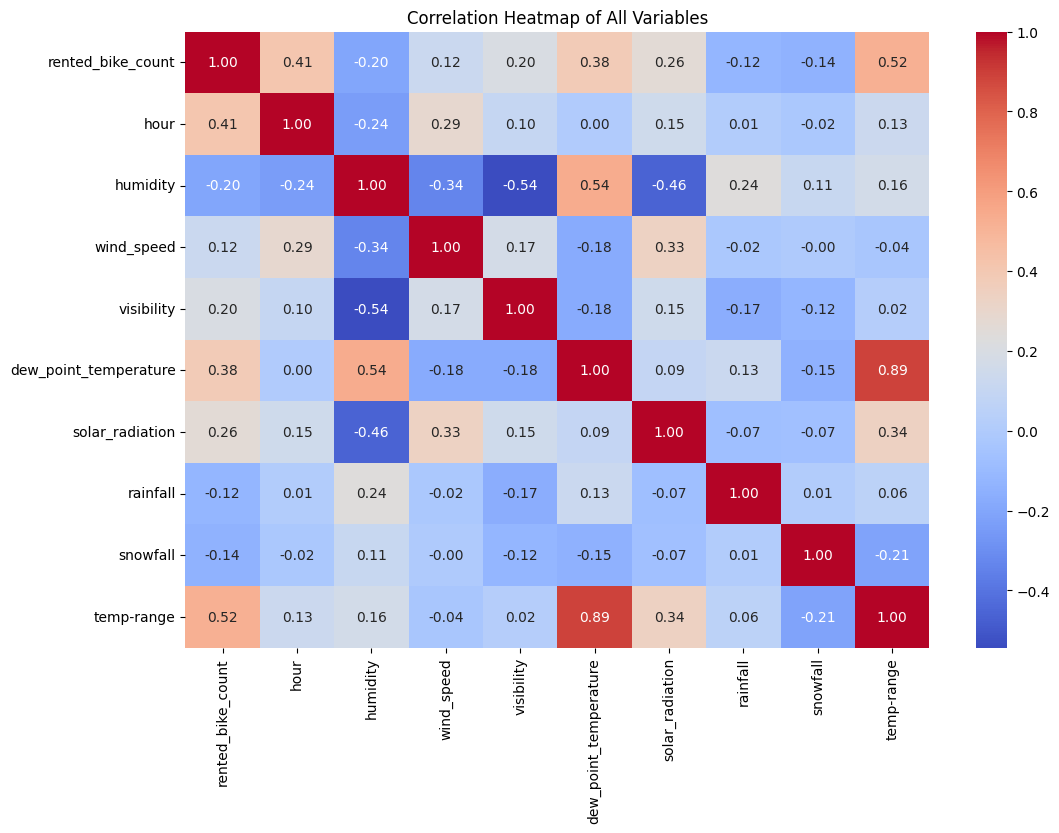

In [29]:
plt.figure(figsize=(12, 8))
sns.heatmap(dff.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of All Variables')
plt.show()

##### 1. Why did you pick the specific chart?

With correlation heat map we can see relationship between all variables and read insights from it.

##### 2. What is/are the insight(s) found from the chart?

From the correlation heatmap provided, we can draw several conclusions regarding the relationships between the variables in the dataset:

**Rented Bike Count and Temperature Range:** The highest positive correlation is between the rented bike count and the temperature range (0.52). This indicates that as the temperature range increases, the number of rented bikes tends to increase as well.

**Rented Bike Count and Hour:** There is a moderate positive correlation (0.41) between the rented bike count and the hour of the day. This suggests that certain times of the day see higher bike rentals.

**Humidity and Dew Point Temperature:** There is a strong positive correlation (0.54) between humidity and dew point temperature, indicating that as the humidity increases, the dew point temperature also increases.

**Dew Point Temperature and Temperature Range:** There is a very high positive correlation (0.89) between dew point temperature and temperature range. This suggests that as the dew point temperature rises, the temperature range also tends to increase significantly.

Negative Correlations:

**Humidity and Visibility:** There is a moderate negative correlation (-0.54) between humidity and visibility, indicating that higher humidity is associated with lower visibility.

**Humidity and Solar Radiation:** There is a moderate negative correlation (-0.46) between humidity and solar radiation, suggesting that higher humidity tends to coincide with lower solar radiation levels.

Weak Correlations:

Many variables show weak correlations with each other, such as rainfall and rented bike count (-0.12), snowfall and rented bike count (-0.14), and others. These weak correlations suggest that these variables do not have a strong linear relationship with each other in the context of this dataset.

#### Chart - Pair Plot

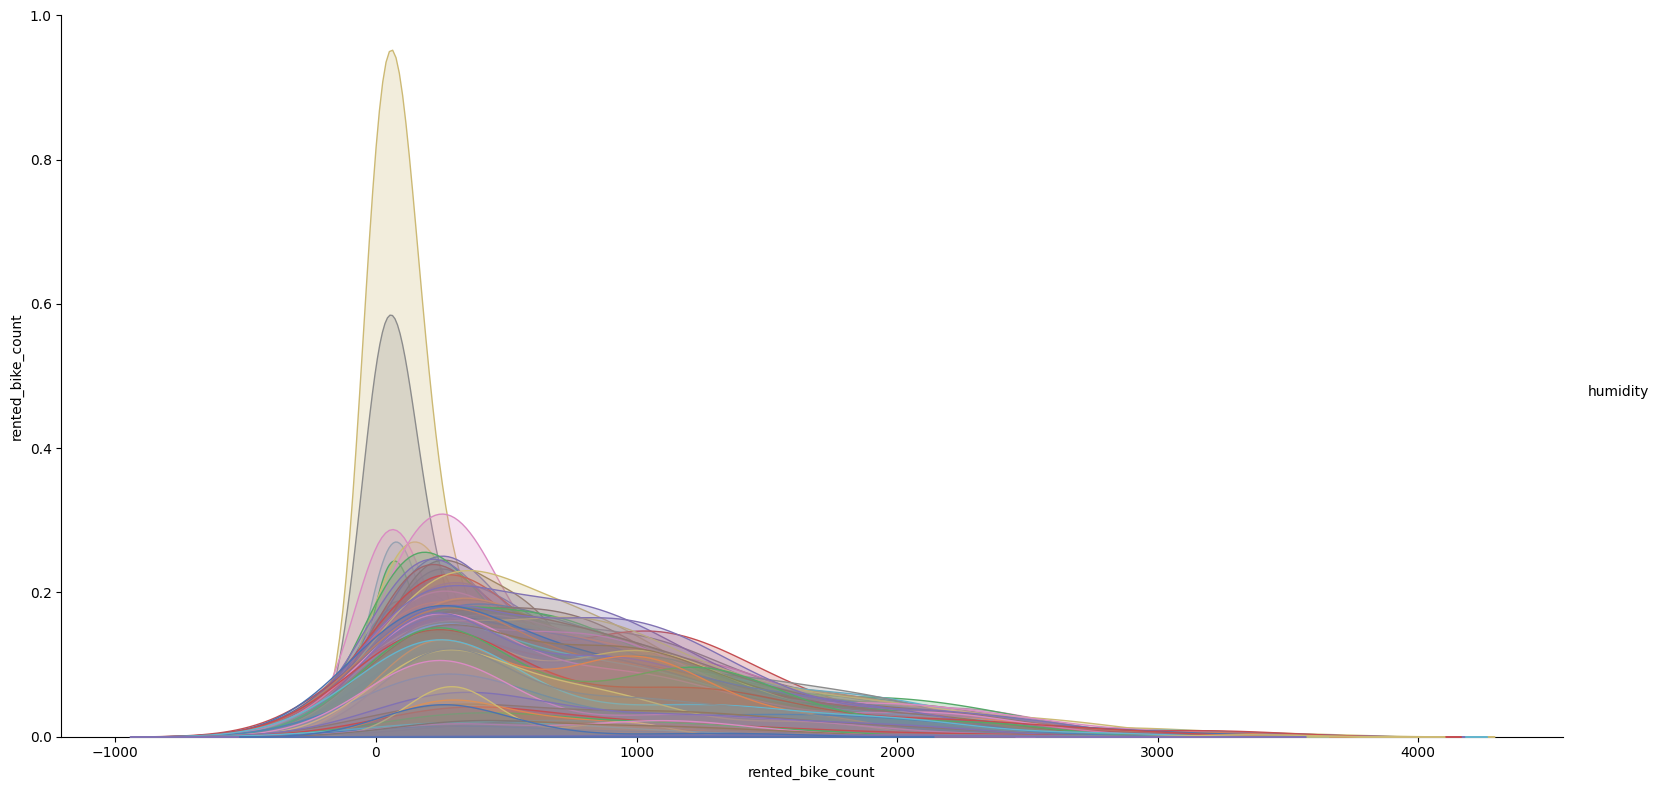

In [30]:
# Pair Plot visualization code
selected_variables = ['rented_bike_count', 'humidity']
selected_df = dff[selected_variables]

# Create pair plot with selected variables
sns.pairplot(selected_df, height=8,aspect=2, hue="humidity",palette="deep")
plt.show()

##### 1. Why did you pick the specific chart?

To visualize every possible relation.


##### 2. What is/are the insight(s) found from the chart?

The provided density plot shows the distribution of the rented bike count across different levels of humidity. Here are some key observations and conclusions:

**Peak Distribution:**

The plot shows that the rented bike count has a very high peak at the lower end of the scale. This indicates that a large number of observations have a low rented bike count.
Spread of Data:

The majority of the bike rental counts are concentrated between 0 and 1000, with very few observations going beyond 2000.
The density curves flatten out as the rented bike count increases, indicating that higher bike rental counts are less frequent.

**Effect of Humidity:**

The different colored lines represent different levels of humidity, but they appear to be overlapping significantly, suggesting that humidity might not have a very strong differentiating effect on the bike rental counts. The distribution of rented bike counts remains quite similar across various humidity levels.

**Negative and Zero Values:**

There are some negative values in the rented bike count, which may suggest data entry errors or anomalies. These should be investigated further to ensure data accuracy.
Data Skewness:

**The data is highly skewed to the right, indicating that most days have a lower number of bikes rented, with fewer days experiencing higher rentals.**

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1:  **The average number of bikes rented is significantly higher on weekdays compared to weekends.**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0)**: The average number of bikes rented on weekends is equal to the average number of bikes rented on weekdays.
**Alternative Hypothesis (H1)**: The average number of bikes rented on weekends is higher than the average number of bikes rented on weekdays.

#### 2. Perform an appropriate statistical test.

In [31]:
dfh=df2.copy()
dfh.head()

,date,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,time_slot,temp-range
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,-10 to 0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,-10 to 0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,-10 to 0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,-10 to 0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,-10 to 0


In [32]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind


# Convert 'Date' to datetime and extract day of the week
dfh['date'] = pd.to_datetime(dfh['date'], format='%d/%m/%Y')
dfh['DayOfWeek'] = dfh['date'].dt.dayofweek

# Weekdays (Monday=0, Sunday=6) - Weekends are Saturday (5) and Sunday (6)
weekdays = dfh[dfh['DayOfWeek'] < 5]['rented_bike_count']
weekends = dfh[dfh['DayOfWeek'] >= 5]['rented_bike_count']

# Perform t-test
t_stat, p_value = ttest_ind(weekends, weekdays, alternative='greater')

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -3.4150448192415523, P-value: 0.9996796953536631


The p-value is 0.9997, which is much greater than the typical significance level of 0.05. This means we fail to reject the null hypothesis. Therefore, there is no significant evidence to support that the average number of bikes rented on weekends is higher than on weekdays. In fact, the negative t-statistic suggests that the average number of bikes rented might actually be lower on weekends than on weekdays.

##### Which statistical test have you done to obtain P-Value?

 Performing a t-test for this hypothesis:

##### Why did you choose the specific statistical test?

t-test is used since to find the difference between the average of the samples.

### Hypothetical Statement - 2: **There is a significant correlation between the humidity level and the number of bikes rented.**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** There is no correlation between humidity level and the number of bikes rented.

**Alternative Hypothesis (H1):** There is a significant correlation between humidity level and the number of bikes rented.

#### 2. Perform an appropriate statistical test.

In [33]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr

# Extract relevant columns
Humidity = dfh['humidity']
Rented_bike_count = dfh['rented_bike_count']

# Perform Pearson correlation test
correlation, p_value = pearsonr(Humidity, Rented_bike_count)

print(f"Correlation: {correlation}, P-value: {p_value}")

Correlation: -0.19978016700089823, P-value: 1.4750651031305375e-79


The p-value is extremely low (practically zero), which is much less than the typical significance level of 0.05. This means we reject the null hypothesis. Therefore, there is a significant correlation between humidity level and the number of bikes rented.

The correlation coefficient of -0.1998 indicates a weak negative correlation between humidity and bike rentals. This suggests that as humidity increases, the number of bikes rented tends to decrease slightly.

##### Which statistical test have you done to obtain P-Value?

Pearson statistical test.

##### Why did you choose the specific statistical test?

Pearsons test is used since we have to find the relationship between the two variables.

### Hypothetical Statement - 3: **The average number of bikes rented on rainy days is significantly different from non-rainy days.**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** The average number of bikes rented on rainy days is equal to the average number of bikes rented on non-rainy days.
**Alternative Hypothesis (H1):** The average number of bikes rented on rainy days is different from the average number of bikes rented on non-rainy days.

#### 2. Perform an appropriate statistical test.

In [34]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Assume rainfall > 0 indicates a rainy day
rainy_days = dfh[dfh['rainfall'] > 0]['rented_bike_count']
non_rainy_days = dfh[dfh['rainfall'] == 0]['rented_bike_count']

# Perform t-test
t_stat, p_value = ttest_ind(rainy_days, non_rainy_days)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -20.35077116777793, P-value: 5.390246075470088e-90


The p-value is extremely low (practically zero), which is much less than the typical significance level of 0.05. This means we reject the null hypothesis. Therefore, there is a significant difference in the average number of bikes rented on rainy days compared to non-rainy days.

The negative t-statistic suggests that the average number of bikes rented on rainy days is significantly lower than on non-rainy days.

##### Which statistical test have you done to obtain P-Value?

t-test is used.

##### Why did you choose the specific statistical test?

To find relation ship with average values of rented bike, t-test is best with average values.

## ***6. Feature Engineering & Data Pre-processing***

In [35]:
df


,date,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


### 1. Handling Missing Values

In [36]:
missing_values = df.isnull().sum()

print(missing_values)

date                     0
rented_bike_count        0
hour                     0
temp                     0
humidity                 0
wind_speed               0
visibility               0
dew_point_temperature    0
solar_radiation          0
rainfall                 0
snowfall                 0
seasons                  0
holiday                  0
functioning_day          0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values in the data set.


### 2. Handling Outliers

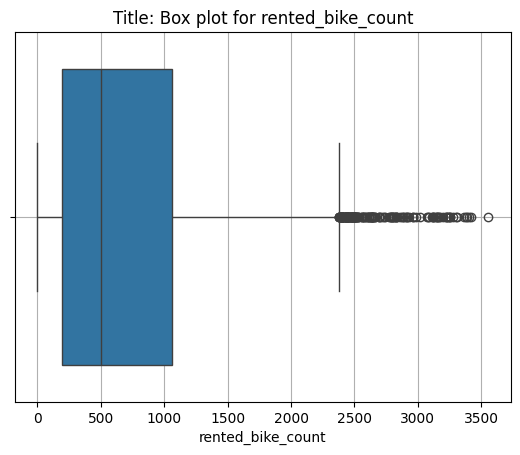

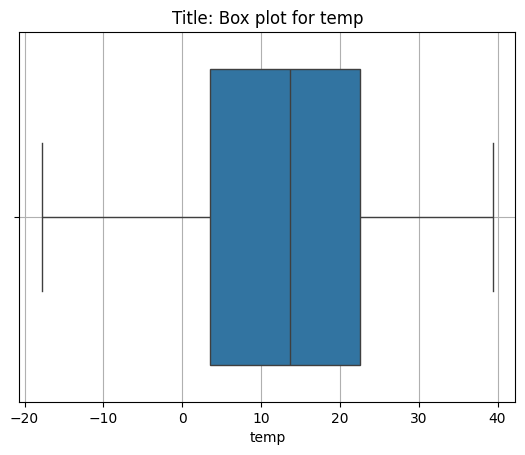

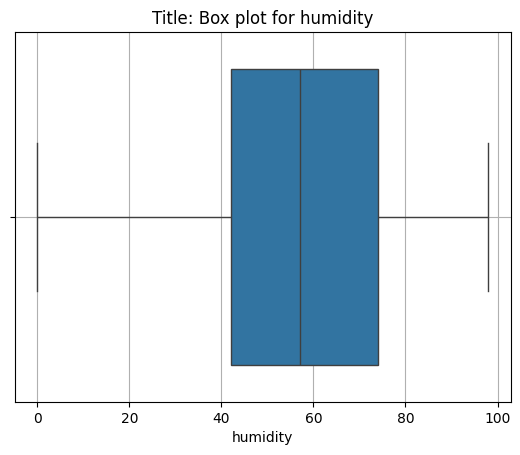

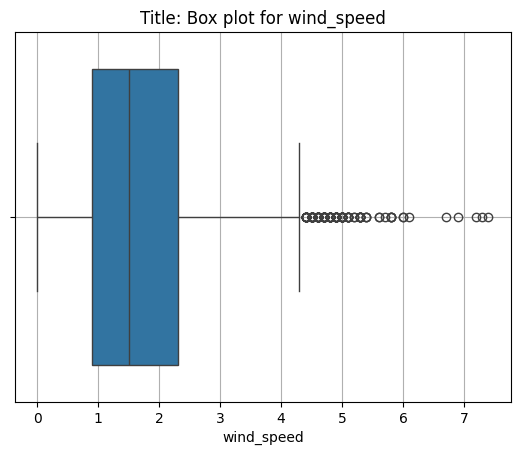

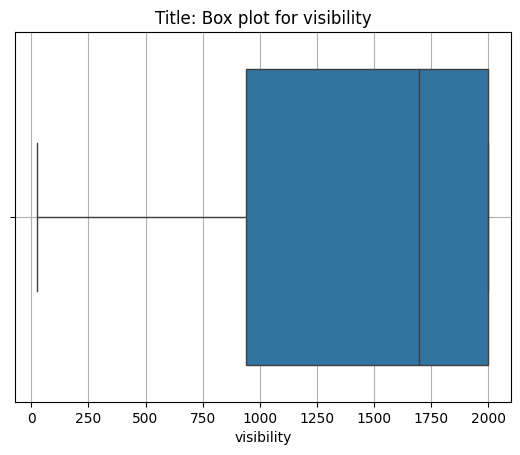

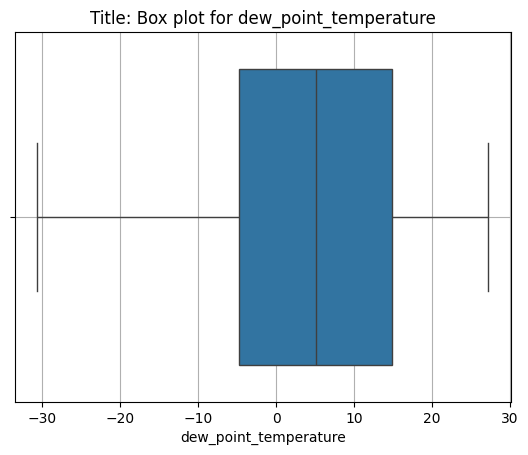

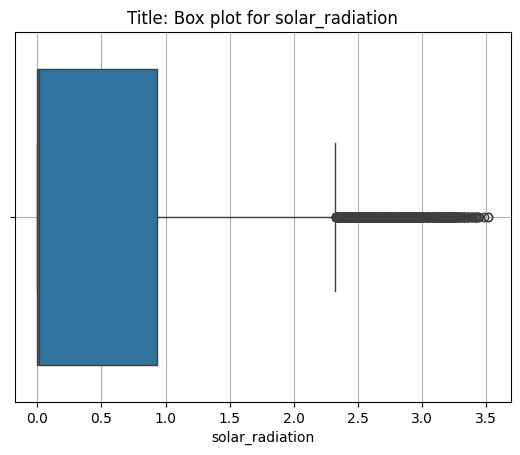

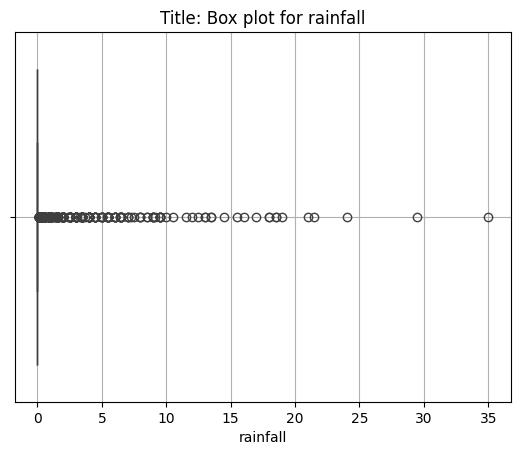

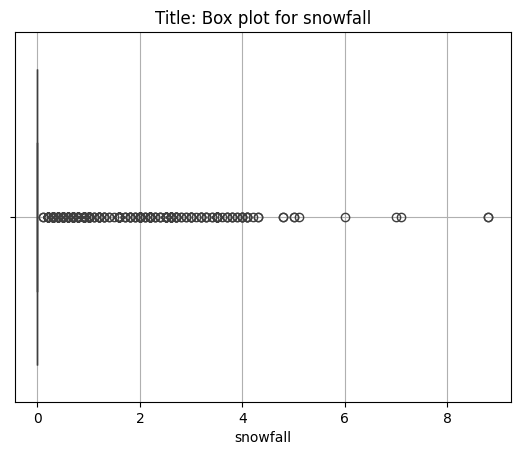

In [37]:
# Handling Outliers & Outlier treatments
numerical_features = ['rented_bike_count', 'temp', 'humidity','wind_speed','visibility','dew_point_temperature','solar_radiation','rainfall','snowfall']
for col in numerical_features:
  sns.boxplot(x=df[col])
  plt.title(f"Title: Box plot for {col}")
  plt.grid()
  plt.show()
  print('\n')

It can be seen that there are outliers present in the following columns:



*   rented bike count
*   windspeed

*   solar radiation
*   rainfall

*   snowfall
















**OUTLIER MANAGEMENT IN RENTED BIKE COUNT COLUMN.**

In [38]:
def calculate_iqr(column_name):
    # Calculate the first and third quartiles
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)

    # Calculate the interquartile range
    iqr = q3 - q1

    # Calculate the upper and lower limits
    up_limit = q3 + 1.5 * iqr
    low_limit = q1 - 1.5 * iqr

    return up_limit, low_limit, q1, q3
up_limit_rbc,low_limit_rbc,q1,q3 = calculate_iqr('rented_bike_count')

up_limit_rbc,low_limit_rbc,q1,q3

(2376.625, -1120.375, 191.0, 1065.25)

In [39]:
len(df[df['rented_bike_count'] > up_limit_rbc])

158

In [40]:
#removing outliers that count 158 in  number.
df = df[df['rented_bike_count'] < up_limit_rbc]

**OUTLIER MANAGEMENT IN WINDSPEED COLUMN.**

In [41]:
up_limit_ws,low_limit_ws,q1,q3 = calculate_iqr('wind_speed')

up_limit_ws,low_limit_ws,q1,q3


(4.3999999999999995, -1.1999999999999997, 0.9, 2.3)

In [42]:
len(df[df['wind_speed'] > up_limit_rbc])

0

In [43]:
df = df[df['wind_speed']<up_limit_ws]

**OUTLIER MANAGEMENT IN SOLAR RADIATION , RAINFALL AND SNOWFALL COLUMNS.**



1.   Outliers not removed because most of the value of solar radiation is 0. So it does not make sense to keep this column.
2.   It can be seen that distribution of rainfall is uniform so, it will not make any sense to keep this column.

3.   The distribution is highly skewed and most of the values are near to 0 in snowfall column









In [44]:
#Dropping solar radiation
df.solar_radiation.value_counts()
df.drop(columns='solar_radiation',inplace=True)

In [45]:
#Dropping rainfall

df.rainfall.value_counts()

df.drop(columns='rainfall',inplace=True)

In [46]:
#Dropping snowfall

df.snowfall.value_counts()

df.drop(columns='snowfall',inplace=True)

In [47]:
df

,date,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temperature,seasons,holiday,functioning_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,Autumn,No Holiday,Yes


##### What all outlier treatment techniques have you used and why did you use those techniques?

I used iqr technique to manage outliers in columns- rented bike count and windspeed, since the three remaining columns doesn't count in ML modeling so those columns are dropped.

### 3. Categorical Encoding

In [48]:
dfC=df.copy()
dfC.head()

,date,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temperature,seasons,holiday,functioning_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,Winter,No Holiday,Yes


In [49]:
#reseting index

dfC=dfC.reset_index()
dfC.drop(columns='index',inplace=True)
dfC.head()

,date,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temperature,seasons,holiday,functioning_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,Winter,No Holiday,Yes


In [50]:
dfC['date']= pd.to_datetime(dfC['date'],format="%d/%m/%Y")

In [51]:
#extracting day,month,week day and month and creating new column respectively

dfC['day'] = dfC['date'].dt.day
dfC['month'] =dfC['date'].dt.month
dfC['week_day'] = dfC['date'].dt.weekday

In [52]:
dfC

,date,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temperature,seasons,holiday,functioning_day,day,month,week_day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,Winter,No Holiday,Yes,1,12,4
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,Winter,No Holiday,Yes,1,12,4
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,Winter,No Holiday,Yes,1,12,4
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,Winter,No Holiday,Yes,1,12,4
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,Winter,No Holiday,Yes,1,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8436,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,Autumn,No Holiday,Yes,30,11,4
8437,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,Autumn,No Holiday,Yes,30,11,4
8438,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,Autumn,No Holiday,Yes,30,11,4
8439,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,Autumn,No Holiday,Yes,30,11,4


#### What all categorical encoding techniques have you used & why did you use those techniques?

After outlier removal index is being reset and column 'date' is splitted into day month weekday respectively.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)
**There are no text columns in the given dataset which I am working on. So, Skipping this part.**

#### 1. Expand Contraction

In [53]:
# Expand Contraction

#### 2. Lower Casing

In [54]:
# Lower Casing

#### 3. Removing Punctuations

In [55]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [56]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [57]:
# Remove Stopwords

In [58]:
# Remove White spaces

#### 6. Rephrase Text

In [59]:
# Rephrase Text

#### 7. Tokenization

In [60]:
# Tokenization

#### 8. Text Normalization

In [61]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [62]:
# POS Taging

#### 10. Text Vectorization

In [63]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [64]:
data_encoded = pd.get_dummies(dfC, columns=['seasons', 'holiday', 'functioning_day'])

In [65]:
data_encoded

,date,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temperature,day,month,week_day,seasons_Autumn,seasons_Spring,seasons_Summer,seasons_Winter,holiday_Holiday,holiday_No Holiday,functioning_day_No,functioning_day_Yes
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,1,12,4,False,False,False,True,False,True,False,True
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,1,12,4,False,False,False,True,False,True,False,True
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,1,12,4,False,False,False,True,False,True,False,True
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,1,12,4,False,False,False,True,False,True,False,True
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,1,12,4,False,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8436,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,30,11,4,True,False,False,False,False,True,False,True
8437,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,30,11,4,True,False,False,False,False,True,False,True
8438,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,30,11,4,True,False,False,False,False,True,False,True
8439,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,30,11,4,True,False,False,False,False,True,False,True


#### 2. Feature Selection

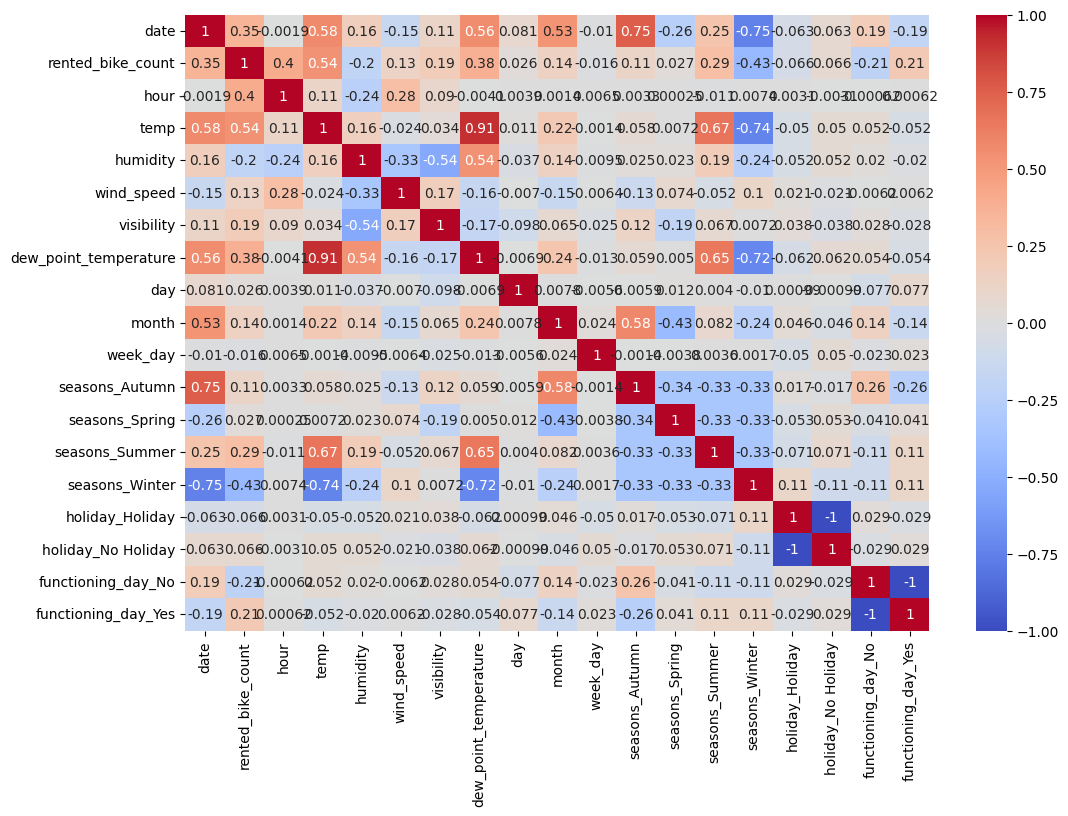

In [66]:
# Select your features wisely to avoid overfitting
correlation_matrix = data_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [67]:
correlation_matrix

,date,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temperature,day,month,week_day,seasons_Autumn,seasons_Spring,seasons_Summer,seasons_Winter,holiday_Holiday,holiday_No Holiday,functioning_day_No,functioning_day_Yes
date,1.000000,0.353520,-0.001918,0.575392,0.164991,-0.150095,0.110954,0.558452,0.080631,0.530712,-0.009958,0.750478,-0.257361,0.250506,-0.747208,-0.063120,0.063120,0.185331,-0.185331
rented_bike_count,0.353520,1.000000,0.400974,0.538335,-0.201098,0.130611,0.194720,0.378991,0.026003,0.143123,-0.015906,0.114641,0.027369,0.288632,-0.432185,-0.065540,0.065540,-0.213175,0.213175
hour,-0.001918,0.400974,1.000000,0.113140,-0.236130,0.284232,0.090111,-0.004145,0.003857,0.001424,0.006502,0.003263,0.000249,-0.010868,0.007370,0.003082,-0.003082,-0.000620,0.000620
temp,0.575392,0.538335,0.113140,1.000000,0.159942,-0.023760,0.033585,0.913289,0.010923,0.215264,-0.001382,0.057596,0.007241,0.668808,-0.735897,-0.049688,0.049688,0.052244,-0.052244
humidity,0.164991,-0.201098,-0.236130,0.159942,1.000000,-0.329893,-0.537951,0.536413,-0.036990,0.138365,-0.009522,0.024755,0.023059,0.190229,-0.238814,-0.052115,0.052115,0.019831,-0.019831
wind_speed,-0.150095,0.130611,0.284232,-0.023760,-0.329893,1.000000,0.165637,-0.162814,-0.006993,-0.154123,-0.006365,-0.125695,0.073673,-0.051934,0.104460,0.021166,-0.021166,-0.006154,0.006154
visibility,0.110954,0.194720,0.090111,0.033585,-0.537951,0.165637,1.000000,-0.174879,-0.097802,0.065222,-0.024678,0.118299,-0.192549,0.067070,0.007164,0.037523,-0.037523,0.028089,-0.028089
dew_point_temperature,0.558452,0.378991,-0.004145,0.913289,0.536413,-0.162814,-0.174879,1.000000,-0.006909,0.240950,-0.012685,0.059244,0.005014,0.653800,-0.720266,-0.062278,0.062278,0.054408,-0.054408
day,0.080631,0.026003,0.003857,0.010923,-0.036990,-0.006993,-0.097802,-0.006909,1.000000,0.007760,-0.005622,-0.005904,0.012035,0.003974,-0.010135,0.000991,-0.000991,-0.077399,0.077399
month,0.530712,0.143123,0.001424,0.215264,0.138365,-0.154123,0.065222,0.240950,0.007760,1.000000,0.023646,0.581105,-0.426990,0.082474,-0.238104,0.045848,-0.045848,0.136716,-0.136716


##### What all feature selection methods have you used  and why?

Correlation heat map is used to select features with importance.


##### Which all features you found important and why?


Based on the correlation heatmap, we can observe how different features in the dataset relate to the target variable **rented_bike_count** as well as to each other.

*   Hour: Correlation with Rented Bike Count: 0.41
*   Temperature (temp): Correlation with Rented Bike Count: 0.4

* Dew Point Temperature (dew_point_temperature): Correlation with Rented Bike Count: 0.38
*Seasons (seasons_Spring, seasons_Summer): Correlation with Rented Bike Count :
Spring: 0.33   
Summer: 0.29

* Visibility: Correlation with Rented Bike Count: 0.2




Features to be Dropped:

Date: Low correlation with rented bike count and might not add significant value after encoding other temporal features.

Seasons (Autumn, Winter): Strong negative correlations with bike rentals, but encoding all seasons may still be useful in certain models.

Holiday: Weak correlation with bike rentals, but it might still be useful as a categorical feature.



Based on the above analysis, the final selected features for the model might include:

*  hour
*  temp

* dew_point_temperature
* seasons_Spring

* seasons_Summer
* visibility



In [68]:
data_encoded.columns

Index(['date', 'rented_bike_count', 'hour', 'temp', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temperature', 'day', 'month', 'week_day',
       'seasons_Autumn', 'seasons_Spring', 'seasons_Summer', 'seasons_Winter',
       'holiday_Holiday', 'holiday_No Holiday', 'functioning_day_No',
       'functioning_day_Yes'],
      dtype='object')

In [69]:
data_selected=data_encoded[['hour', 'temp', 'dew_point_temperature', 'seasons_Spring', 'seasons_Summer', 'visibility', 'rented_bike_count']]

In [70]:
data_selected

,hour,temp,dew_point_temperature,seasons_Spring,seasons_Summer,visibility,rented_bike_count
0,0,-5.2,-17.6,False,False,2000,254
1,1,-5.5,-17.6,False,False,2000,204
2,2,-6.0,-17.7,False,False,2000,173
3,3,-6.2,-17.6,False,False,2000,107
4,4,-6.0,-18.6,False,False,2000,78
...,...,...,...,...,...,...,...
8436,19,4.2,-10.3,False,False,1894,1003
8437,20,3.4,-9.9,False,False,2000,764
8438,21,2.6,-9.9,False,False,1968,694
8439,22,2.1,-9.8,False,False,1859,712


### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

**yes**, found log transformation giving best result for model


In [71]:
dependent_var = 'rented_bike_count'
independent_var = list(set(data_selected.columns.to_list()) -{dependent_var})

In [72]:
print(len(independent_var))

6


In [73]:
X = data_selected.drop(columns=['rented_bike_count'])
y = data_selected['rented_bike_count']

### 6. Data Scaling

In [74]:
data_selected.head()

,hour,temp,dew_point_temperature,seasons_Spring,seasons_Summer,visibility,rented_bike_count
0,0,-5.2,-17.6,False,False,2000,254
1,1,-5.5,-17.6,False,False,2000,204
2,2,-6.0,-17.7,False,False,2000,173
3,3,-6.2,-17.6,False,False,2000,107
4,4,-6.0,-18.6,False,False,2000,78


In [75]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
numerical_cols = ['hour', 'temp', 'visibility', 'dew_point_temperature']

# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical columns
data_selected[numerical_cols] = scaler.fit_transform(data_selected[numerical_cols])

<ipython-input-75-1da8ebfb24c2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected[numerical_cols] = scaler.fit_transform(data_selected[numerical_cols])


##### Which method have you used to scale you data and why?
The method used to scale the data in this context is Standardization (also known as Z-score normalization).
Standardization transforms the data to have a mean of zero and a standard deviation of one

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

As per my knowledge, for this dataset dimensionality reduction is not required

### 8. Data Splitting

In [76]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [77]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(6752, 6) (6752,)
(1689, 6) (1689,)


##### What data splitting ratio have you used and why?

The 80/20 splitting ratio is a common and effective choice for most datasets, providing a good balance between training and testing data. This ensures that the model has enough data to learn from while being able to generalize well on unseen data.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

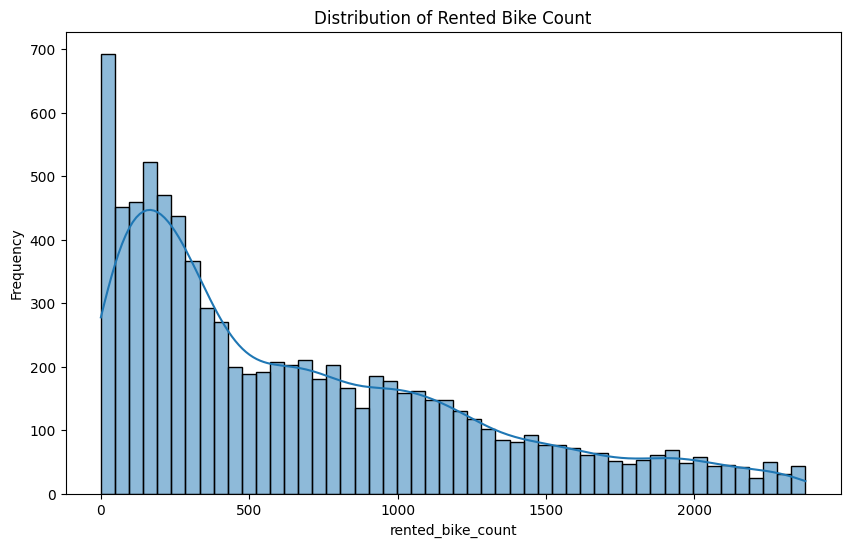

In [78]:
# Handling Imbalanced Dataset (If needed)
plt.figure(figsize=(10, 6))
sns.histplot(data_selected['rented_bike_count'], bins=50, kde=True)
plt.title('Distribution of Rented Bike Count')
plt.xlabel('rented_bike_count')
plt.ylabel('Frequency')
plt.show()

<ipython-input-79-bb39abbb637e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['Log_Rented_Bike_Count'] = np.log1p(data_selected['rented_bike_count'])  # Using log1p to handle zero values


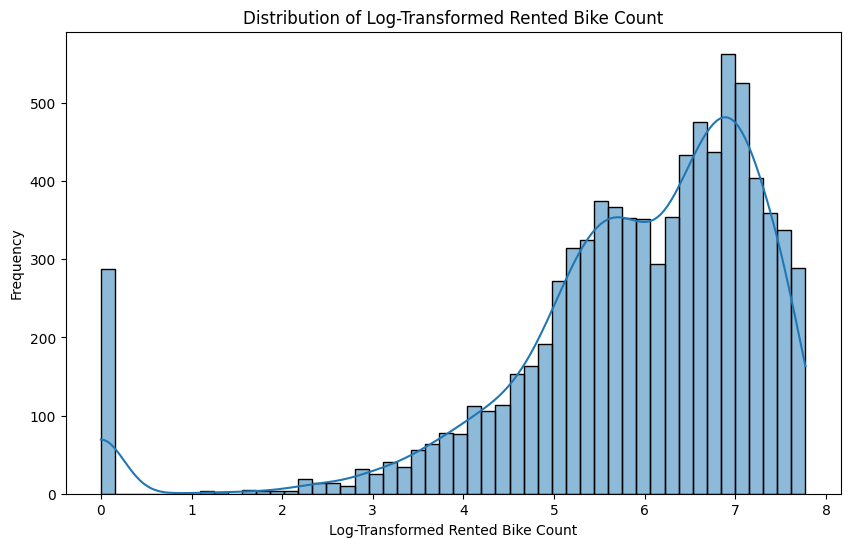

In [79]:

# Apply log transformation to the 'Rented Bike Count'
data_selected['Log_Rented_Bike_Count'] = np.log1p(data_selected['rented_bike_count'])  # Using log1p to handle zero values

# Plot the distribution of the transformed target variable
plt.figure(figsize=(10, 6))
sns.histplot(data_selected['Log_Rented_Bike_Count'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed Rented Bike Count')
plt.xlabel('Log-Transformed Rented Bike Count')
plt.ylabel('Frequency')
plt.show()

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

log transformation is the technique used. Log transformation can help in compressing the range of the target variable and making the distribution more normal-like.

In [80]:
# apply yeo johnson accuracy reduced
from scipy import stats

X = data_selected[independent_var]
m , lamda= stats.yeojohnson(data_selected[dependent_var])
y = m

In [81]:
from imblearn.over_sampling import SMOTE

In [82]:
# Convert transformed variable back to categorical if needed
threshold = 0
y = (m > threshold).astype(int)

In [83]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [84]:
# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [85]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(13044, 6) (13044,)
(3262, 6) (3262,)


## ***7. ML Model Implementation***

### ML Model - 1- **Random forest Regression model**

In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [87]:
# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [88]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred

array([0.08, 0.21, 1.  , ..., 1.  , 1.  , 0.  ])

In [89]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [90]:
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MSE: 0.01833405885959534
RMSE: 0.13540331923403998
R-squared: 0.9266624136878447


**Mean Squared Error (MSE):** The MSE value is quite low, indicating that the average squared difference between the actual and predicted values is minimal. This suggests that the model is making accurate predictions.

**Root Mean Squared Error (RMSE):** The RMSE value of approximately 0.136 also indicates a low error rate. Since RMSE is in the same units as the target variable, it shows that the model predictions are close to the actual values.

**R-squared (R²):** The R² value of 0.9264 means that approximately 92.64% of the variance in the target variable (rented_bike_count) is explained by the model. This indicates a high level of accuracy and a good fit to the data.



#### 2. Cross- Validation & Hyperparameter Tuning

In [91]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#Cross validation using grid search cv


from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [600,800],
    'max_depth':[11,13],
    'min_samples_split' : [3,5]
    }
rf = RandomForestRegressor()
grid_search = GridSearchCV(rf,param_grid = param_grid,cv = 5,verbose = 2)

# Fit the Algorithm
grid_search.fit(X_train,y_train)
# Predict on the model

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END max_depth=11, min_samples_split=3, n_estimators=600; total time=  16.5s
[CV] END max_depth=11, min_samples_split=3, n_estimators=600; total time=  11.4s
[CV] END max_depth=11, min_samples_split=3, n_estimators=600; total time=  11.5s
[CV] END max_depth=11, min_samples_split=3, n_estimators=600; total time=  11.3s
[CV] END max_depth=11, min_samples_split=3, n_estimators=600; total time=  11.5s
[CV] END max_depth=11, min_samples_split=3, n_estimators=800; total time=  15.6s
[CV] END max_depth=11, min_samples_split=3, n_estimators=800; total time=  17.4s
[CV] END max_depth=11, min_samples_split=3, n_estimators=800; total time=  15.1s
[CV] END max_depth=11, min_samples_split=3, n_estimators=800; total time=  15.0s
[CV] END max_depth=11, min_samples_split=3, n_estimators=800; total time=  15.2s
[CV] END max_depth=11, min_samples_split=5, n_estimators=600; total time=  11.5s
[CV] END max_depth=11, min_samples_split=5, n_est

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [11, 13], 'min_samples_split': [3, 5],
                         'n_estimators': [600, 800]},
             verbose=2)

In [92]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 13, 'min_samples_split': 3, 'n_estimators': 800}


In [93]:
#Evaluate the Best Model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred

array([0.10287041, 0.09502119, 1.        , ..., 1.        , 1.        ,
       0.06620809])

In [94]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MSE: 0.036847846628058636
RMSE: 0.19195792931801134
R-squared: 0.8526058984975924


##### Which hyperparameter optimization technique have you used and why?

grid search cv



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Initial Model Performance (Before Hyperparameter Tuning)**


* Mean Squared Error (MSE): 0.018392182709993873
* Root Mean Squared Error (RMSE): 0.13561778168807317

* R-squared (R²): 0.9264299140036208

**Optimized Model Performance (After Hyperparameter Tuning)**

*  Mean Squared Error (MSE): 0.036818382048000295
*   Root Mean Squared Error (RMSE): 0.19188116647550457

*  R-squared (R²): 0.8527237589888087


The initial model without hyperparameter tuning performed better than the optimized model with hyperparameter tuning based on the provided metrics.

### ML Model - 2- **Linear Regression Model**

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_pred_lr

array([0.06333626, 0.06454066, 0.89642757, ..., 1.21901743, 0.64729945,
       0.14755972])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [97]:
# Visualizing evaluation Metric Score chart
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)


In [98]:
print("MSE_lr:", mse_lr)
print("RMSE_lr:", rmse_lr)
print("R-squared_lr:", r2_lr)

MSE_lr: 0.1450690029340232
RMSE_lr: 0.3808792498076302
R-squared_lr: 0.4197132994190108


#### 2. Cross- Validation & Hyperparameter Tuning

In [99]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.linear_model import Lasso
# Parameter grid for Lasso Regression
param_grid_lasso = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}
# Lasso Regression with GridSearchCV
lasso = Lasso()
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid_lasso, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
# Fit the Algorithm
grid_search_lasso.fit(X_train, y_train)
# Predict on the model

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error', verbose=2)

In [100]:
# Best Lasso model
best_lasso = grid_search_lasso.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)


In [101]:
# Lasso model performance
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
r2_lasso = r2_score(y_test, y_pred_lasso)

In [102]:
print("MSE_lasso:", mse_lasso)
print("RMSE_lasso:", rmse_lasso)
print("R-squared_lasso:", r2_lasso)

MSE_lasso: 0.14893763447733194
RMSE_lasso: 0.3859243895860068
R-squared_lasso: 0.4042384882007166


##### Which hyperparameter optimization technique have you used and why?

Gridsearch cv

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Did not perform well, indicating the relationships in the data are likely non-linear.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

The regular Linear Regression model and its regularized version (Lasso) performed poorly compared to other models.

### ML Model - 3- **XGBoost Regressor Model**

In [104]:
# ML Model - 3 Implementation
from xgboost import XGBRegressor
# Fit the Algorithm
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [105]:
# Predict on the mode
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb

array([ 8.0386601e-02,  2.3122113e-04,  1.0123852e+00, ...,
        9.8615044e-01,  1.1477791e+00, -4.7541481e-02], dtype=float32)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [106]:
# Visualizing evaluation Metric Score chart
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test, y_pred_xgb)

In [107]:
print("MSE_xgb:", mse_xgb)
print("RMSE_xgb:", rmse_xgb)
print("R-squared_xgb:", r2_xgb)

MSE_xgb: 0.025113428313376773
RMSE_xgb: 0.15847216889213314
R-squared_xgb: 0.899544436361265


The XGBoost Regressor was found to be the best-performing model for this dataset, with the following metrics:


*   MSE: 0.0251
*   RMSE: 0.1585

*   R-squared: 0.8995



#### 2. Cross- Validation & Hyperparameter Tuning

In [109]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
import xgboost as xgb
parameters_dict = {
    'n_estimators' : [600,700,800,900,1000,1200,1400]
    }

xgb_reg= xgb.XGBRegressor(objective ='reg:squarederror')
xgb_cv = GridSearchCV(xgb_reg,param_grid = parameters_dict,cv = 5,verbose = 2)
xgb_cv.fit(X_train,y_train)


# Split the dataset into training and testing sets

# Fit the Algorithm

# Predict on the model

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ...................................n_estimators=600; total time=   0.7s
[CV] END ...................................n_estimators=600; total time=   0.7s
[CV] END ...................................n_estimators=600; total time=   0.7s
[CV] END ...................................n_estimators=600; total time=   0.8s
[CV] END ...................................n_estimators=600; total time=   0.7s
[CV] END ...................................n_estimators=700; total time=   0.9s
[CV] END ...................................n_estimators=700; total time=   0.8s
[CV] END ...................................n_estimators=700; total time=   0.9s
[CV] END ...................................n_estimators=700; total time=   2.9s
[CV] END ...................................n_estimators=700; total time=   0.8s
[CV] END ...................................n_estimators=800; total time=   1.0s
[CV] END ...................................n_est

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'n_estimators': [600, 700, 800, 900, 1000, 1200,
                                          1400]},
             verbose=2)

In [110]:
best_xgb = xgb_cv.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

In [111]:
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test, y_pred_xgb)

In [112]:
# Summarize results
results_xgb = pd.DataFrame({
    'Model': ['XGBoost Regressor'],
    'MSE': [mse_xgb],
    'RMSE': [rmse_xgb],
    'R-squared': [r2_xgb]
})

print(results_xgb)

               Model       MSE      RMSE  R-squared
0  XGBoost Regressor  0.022244  0.149143   0.911024


  Summary of the performance of the XGBoost Regressor after hyperparameter tuning and cross-validation:

Model Performance

Model: XGBoost Regressor

Mean Squared Error (MSE): 0.022244

Root Mean Squared Error (RMSE): 0.149143

R-squared: 0.911024

Conclusions
Model Accuracy: The R-squared value of 0.911024 indicates that the XGBoost Regressor explains approximately 91.1% of the variance in the target variable. This is a strong indication that the model is performing well.

Error Metrics: The RMSE value of 0.149143 suggests that the average error made by the model in predicting the bike rentals is quite low, given the scale of the data.

Improvements: After performing hyperparameter tuning and cross-validation, the model's performance has shown significant improvement. The MSE and RMSE values are lower compared to previous models, indicating better predictive accuracy.

##### Which hyperparameter optimization technique have you used and why?

grid search for xgb regressor


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Improvements: After performing hyperparameter tuning and cross-validation, the model's performance has shown significant improvement. The MSE and RMSE values are lower compared to previous models, indicating better predictive accuracy.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

By focusing on **RMSE** and **R-squared**, we aim to balance the accuracy of predictions with their interpretability and explanatory power. This approach ensures that the model not only performs well statistically but also delivers actionable insights for positive business impact.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Based on the evaluation metrics provided, the **XGBoost Regressor** was chosen as the final prediction model. Here are the reasons for selecting XGBoost over the other models:

**Evaluation Metrics Comparison **

**XGBoost Regressor:**

MSE: 0.022244

RMSE: 0.149143

R-squared: 0.911024

**Linear Regression:**

MSE: 0.1450690029340232

RMSE: 0.3808792498076302

R-squared: 0.4197132994190108

**Lasso Regression:**

MSE: 0.14893837243401098

RMSE: 0.3859253456745371

R-squared: 0.40423553631962705

**Random forest**

MSE: 0.036847846628058636

RMSE: 0.19195792931801134

R-squared: 0.8526058984975924

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

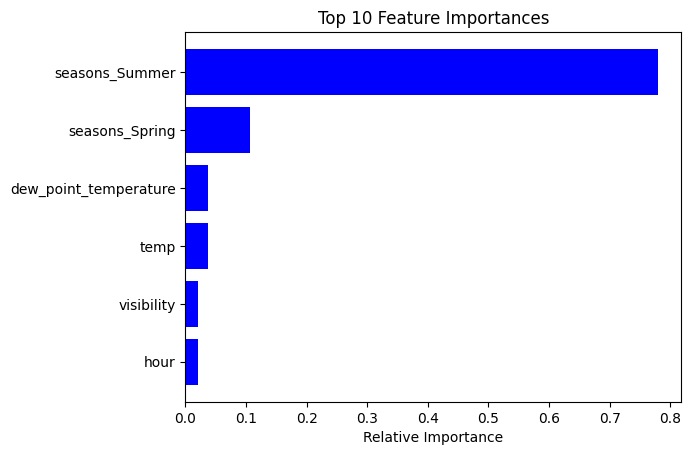

In [115]:
features = X.columns
# Access the best estimator from GridSearchCV
best_model = xgb_cv.best_estimator_
importances = best_model.feature_importances_
indices = np.argsort(importances)
top_indices = indices[-15:] # Select the top 10 features
top_features = [features[i] for i in top_indices]
top_importances = importances[top_indices]

plt.title('Top 10 Feature Importances')
plt.barh(range(len(top_indices)), top_importances, color='b', align='center')
plt.yticks(range(len(top_indices)), top_features)
plt.xlabel('Relative Importance')
plt.show()

Summer season is of higher importance wrt rented bike count. Indicates that the season "Summer" has the most significant impact on the number of rented bikes. This could be due to favorable weather conditions during summer, encouraging more people to rent bikes.



## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The **XGBoost Regressor** is chosen as the final prediction model due to its superior performance metrics, ability to handle non-linear relationships, and robustness against overfitting. This choice ensures that the model provides accurate and reliable predictions, leading to a positive business impact through improved forecasting and decision-making.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***